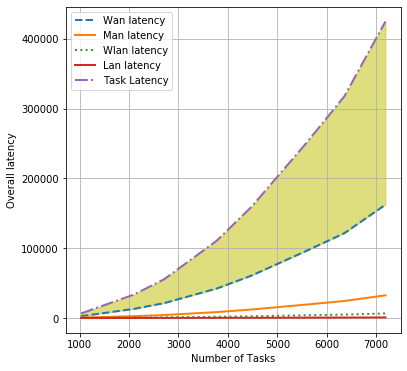

In [44]:
import pandas as pd
get_ipython().run_line_magic('matplotlib', 'inline')

import matplotlib.pyplot as plt
pd.options.display.max_rows=10
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
import xgboost
import graphviz
import matplotlib.dates as md
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
#from sklearn.datasets import make_classification
#from sklearn.ensemble import RandomForestClassifier
import scipy
from scipy.stats import spearmanr
from pylab import rcParams
import seaborn as sb
from matplotlib.pylab import rcParams
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller, arma_order_select_ic
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import csv   
#import MyAnalysis 
rcParams['figure.figsize'] = 6,6

#Import for threading

import random
import sys
from threading import Thread, RLock
import time

import numpy as np

homeTraceFile="/home/fsmiguel/Documents/trace/"
homeTraceFileResult="/home/fsmiguel/Documents/trace/result/"
#For tasks
#dfTask = pd.read_table("/home/fsmiguel/Documents/trace/Task.csv",sep = ',',header = 0)
#print(df)


#For Latency
#dfLatency = pd.read_table("/home/fsmiguel/Documents/trace/Latency.csv",sep = ',',header = 0)

#Function that helps to create the final file to store resulting means from initial simulations
def createPythonTraceFile(homeTraceFileResult):
    latency = pd.DataFrame(columns=['numOfAVs','taskDelay', 'wanDelay','manDelay','wlanDelay','lanDelay'])
    task=pd.DataFrame(columns=['numOfAVs','NumberOfTasks', 'NumberOfLocalTask','NumberOfAwayTaskDueToPosition'
                              ,'NumberOfAwayTaskDueToCapacity','NumberOfTaskProcessed'])
    computing=pd.DataFrame(columns=['numOfAVs','ras', 'ras','ras'])
    storing=pd.DataFrame(columns=['numOfAVs','ras', 'ras','ras'])
    ram=pd.DataFrame(columns=['numOfAVs','ras', 'ras','ras'])
    bandwidth=pd.DataFrame(columns=['numOfAVs','ras', 'ras','ras'])

    latency.to_csv(homeTraceFileResult+'Latency.csv', index=False)
    task.to_csv(homeTraceFileResult+'Task.csv', index=False)
    computing.to_csv(homeTraceFileResult+'Computing.csv', index=False)
    storing.to_csv(homeTraceFileResult+'Storing.csv', index=False)
    ram.to_csv(homeTraceFileResult+'Ram.csv', index=False)
    bandwidth.to_csv(homeTraceFileResult+'Bandwidth.csv', index=False)




def meanComputation(listOftypeOfAnalysis,listOfAvNumber):
    for i in range(len(listOfAvNumber)):
        for j in range(len(listOftypeOfAnalysis)):
            fileName= listOftypeOfAnalysis[j]+str(listOfAvNumber[i])+"_AV.csv"
            tableReade=pd.read_table(homeTraceFile+fileName,sep = ',',header = 0)
            if listOftypeOfAnalysis[j]=="Latency_":
                taskDelay=tableReade['taskDelay']
                wanDelay=tableReade['wanDelay']
                manDelay=tableReade['manDelay']
                wlanDelay=tableReade['wlanDelay']
                lanDelay=tableReade['lanDelay']
                fields=[listOfAvNumber[i],np.sum(taskDelay),np.sum(wanDelay)
                        ,np.sum(manDelay),np.sum(wlanDelay),np.sum(lanDelay)]
                location=homeTraceFileResult+'Latency.csv'
                with open(location, 'a',newline='') as f:
                    writer = csv.writer(f)
                    writer.writerow(fields)
            else:
                if listOftypeOfAnalysis[j]=="Task_":
                    numOfTasks=tableReade['NumberOfTasks']
                    numberOfLocalTask=tableReade['NumberOfLocalTask']
                    numberOfAwayTaskDueToPosition=tableReade['NumberOfAwayTaskDueToPosition']
                    numberOfAwayTaskDueToCapacity=tableReade['NumberOfAwayTaskDueToCapacity']
                    numberOfTaskProcessed=tableReade['NumberOfTaskProcessed']
                    fields=[listOfAvNumber[i],np.mean(numOfTasks),np.mean(numberOfLocalTask)
                        ,np.mean(numberOfAwayTaskDueToPosition)
                        ,np.mean(numberOfAwayTaskDueToCapacity),np.mean(numberOfTaskProcessed)]
                location=homeTraceFileResult+'Task.csv'
                with open(location, 'a',newline='') as f:
                    writer = csv.writer(f)
                    writer.writerow(fields)
                

def simpleTaskCurve(X,Y1,Y2):
    plt.plot(X, Y1,label="Task Computed locally",linestyle="--",lw=2)
    plt.plot(X, Y2,label="Task Computed Away",linestyle=":",lw=2)
    plt.yscale('linear')#By default it it is linear, may also be: {"linear", "log", "symlog", "logit", ...} or ScaleBase
    plt.xscale('linear')
    plt.fill_between(X, Y1, Y2, color='y', alpha=.5)

    plt.legend()
    #plt.xlim(0, 1000)  # decreasing time
    #plt.ylim(0, 1000)
    #plt.xlabel('Number of Tasks generated')
    #plt.ylabel('Number of tasks processed locally')
    plt.grid(True)
    plt.savefig("TaskGeneratedVSTaskProcessed100AVs.png", format='png', bbox_inches='tight', pad_inches=0)
    #plt.clf()
    
def simpleLatencyCurve():
    tableReade=pd.read_table(homeTraceFileResult+'Latency.csv',sep = ',',header = 0)
    numberOfTasks=tableReade['NumberOfTasks']
    numAvs=tableReade['numOfAVs']
    taskDelay=tableReade['taskDelay']
    wanDelay=tableReade['wanDelay']
    manDelay=tableReade['manDelay']
    wlanDelay=tableReade['wlanDelay']
    lanDelay=tableReade['lanDelay']
    plt.plot(numberOfTasks, wanDelay,label="Wan latency",linestyle="--",lw=2)
    plt.plot(numberOfTasks, manDelay,label="Man latency",linestyle="solid",lw=2)
    plt.plot(numberOfTasks, wlanDelay,label="Wlan latency",linestyle=":",lw=2)
    plt.plot(numberOfTasks, lanDelay,label="Lan latency",linestyle="-",lw=2)
    plt.plot(numberOfTasks, taskDelay,label="Task Latency",linestyle="-.",lw=2)
    plt.yscale('linear')#By default it it is linear, may also be: {"linear", "log", "symlog", "logit", ...} or ScaleBase
    plt.xscale('linear')
    plt.fill_between(numberOfTasks, taskDelay, wanDelay, color='y', alpha=.5)

    plt.legend()
    #plt.xlim(0, 1000)  # decreasing time
    #plt.ylim(0, 1000)
    plt.xlabel('Number of Tasks')
    plt.ylabel('Overall latency')
    plt.grid(True)
    plt.savefig("TaskLatency.png", format='png', bbox_inches='tight', pad_inches=0)
    #plt.clf()


def histogramme(X,Y1,Y2):
    n_bins = 5
    fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
    axs.hist(X, bins = n_bins,label="Task Computed locally", alpha=.1)
    axs.hist(Y1, bins = n_bins,label="Task Computed locally", alpha=.8)
    axs.hist(Y2, bins = n_bins,label="Task Computed Away", alpha=.3)
    plt.legend()
    plt.show()
    

#histogramme(X,Y1,Y2)
#simpleTaskCurve(XTasks,Y1Tasks,Y2Tasks)
#simpleLatencyCurve(taskDelay,wanDelay,manDelay,wlanDelay,lanDelay)

#listOftypeOfAnalysis=["Latency_","Computing_","Storing_","Ram_","Bandwidth_","Task_"]
#createPythonTraceFile(homeTraceFileResult)
#listOftypeOfAnalysis=["Latency_","Task_"]
#listOfAvNumber=[25,50,75,100,125,150,175,200]
#meanComputation(listOftypeOfAnalysis,listOfAvNumber)



simpleLatencyCurve()